# Fraud Detection 
## Binary Imbalanced Classification Problem

#### Agorithms to be used
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- KNN



#### Metrics used to validate Performance of the model
- Confusion Matrix
- Precision
- Recall
- F1 Score
- Area Under ROC Curve (AUROC) 

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv('creditcard.csv')

In [105]:
df = data.copy(deep=True)

In [106]:
df.shape

(284807, 31)

In [107]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [108]:
df['Time_num'] = df['Time']

In [109]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_num'],
      dtype='object')

In [110]:
df.Class.unique()

array([0, 1])

In [111]:
# year =  1970 for whole data for month January  of two days transaction data

In [112]:
df['Times'] = pd.to_datetime(df['Time'], unit='s') 

In [113]:
df['Time_of_Day'] = pd.cut(df['Times'].dt.hour,
                           bins=[0, 6, 12, 18, 24],  # Define the time bins for morning, afternoon, evening, and night
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)

In [114]:
df['TimeSinceLastTransaction'] = df['Times'].diff().dt.total_seconds()


In [115]:
df['Time'] = df['Times'].dt.time

In [116]:
df['Times'] = pd.to_datetime(df['Times'],format='%H:%M:%S').dt.time

In [124]:
df = df[['TimeSinceLastTransaction', 'Amount','Time_of_Day','Time_num','Class']]

In [125]:
df.describe()

,TimeSinceLastTransaction,Amount,Time_num,Class
count,284806.000000,284807.000000,284807.000000,284807.000000
mean,0.606701,88.349619,94813.859575,0.001727
std,1.053381,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.600000,54201.500000,0.000000
50%,0.000000,22.000000,84692.000000,0.000000
75%,1.000000,77.165000,139320.500000,0.000000
max,32.000000,25691.160000,172792.000000,1.000000


In [127]:
df.dtypes

TimeSinceLastTransaction     float64
Amount                       float64
Time_of_Day                 category
Time_num                     float64
Class                          int64
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Time                      284807 non-null  object  
 1   TimeSinceLastTransaction  284806 non-null  float64 
 2   Amount                    284807 non-null  float64 
 3   Time_of_Day               284807 non-null  category
 4   times                     284807 non-null  object  
 5   Class                     284807 non-null  int64   
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 11.1+ MB


In [5]:
data = pd.read_csv('Cleaned.csv')


In [6]:
df = data[['Time_num','Time_of_Day','TimeSinceLastTransaction','Amount','Class']]

In [7]:
df

,Time_num,Time_of_Day,TimeSinceLastTransaction,Amount,Class
0,0.0,Night,NaN,149.62,0
1,0.0,Night,0.0,2.69,0
2,1.0,Night,1.0,378.66,0
3,1.0,Night,0.0,123.50,0
4,2.0,Night,1.0,69.99,0
...,...,...,...,...,...
284802,172786.0,Evening,1.0,0.77,0
284803,172787.0,Evening,1.0,24.79,0
284804,172788.0,Evening,1.0,67.88,0
284805,172788.0,Evening,0.0,10.00,0


In [8]:
df.dropna(inplace=True)

/tmp/ipykernel_7022/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
total_rows = df.shape[0]
fraud = df[df['Class'] == 1]
fraud_count = fraud.shape[0]
per = (fraud_count/total_rows)*100
print('Percentage of Fraud transaction',per)

Percentage of Fraud transaction 0.1727491696101908


In [10]:
df.Class.value_counts()

Class
0    284314
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

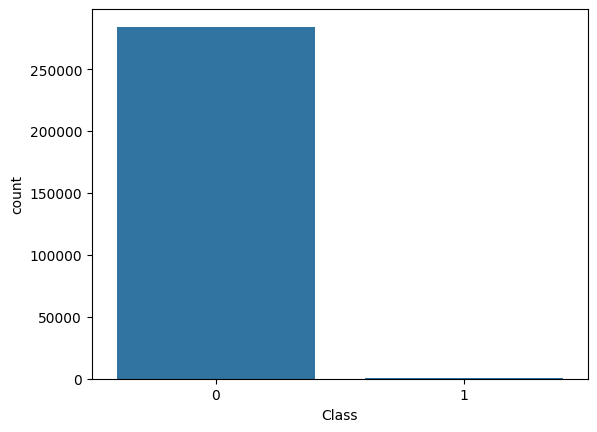

In [11]:
sns.barplot(df['Class'].value_counts())

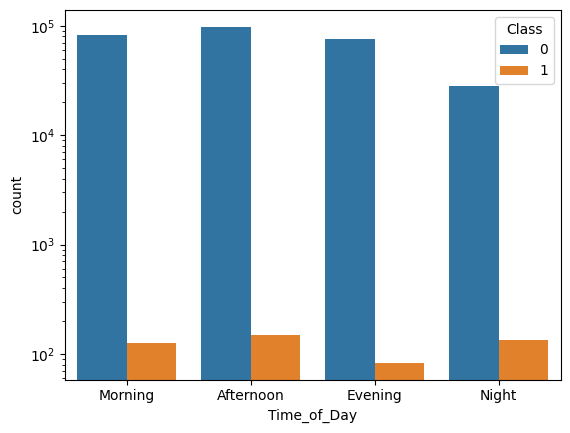

In [12]:
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.barplot(x = "Time_of_Day", y = "count", hue = "Class", data=df.groupby(['Time_of_Day', 'Class']).size().to_frame(name='count').reset_index(),order=time_order)
plt.yscale('log')  # Set y-axis to log scale for better visualization
plt.show()

<Axes: ylabel='Amount'>

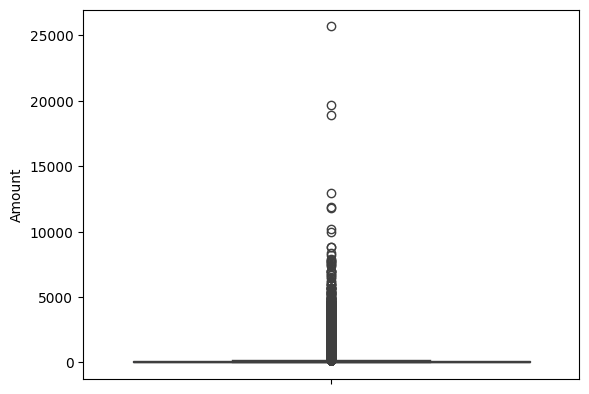

In [13]:
sns.boxplot(df['Amount'])

In [14]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

<Axes: ylabel='Amount'>

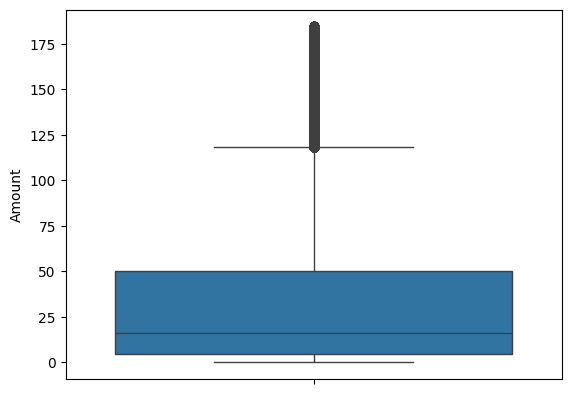

In [15]:
sns.boxplot(df['Amount'])

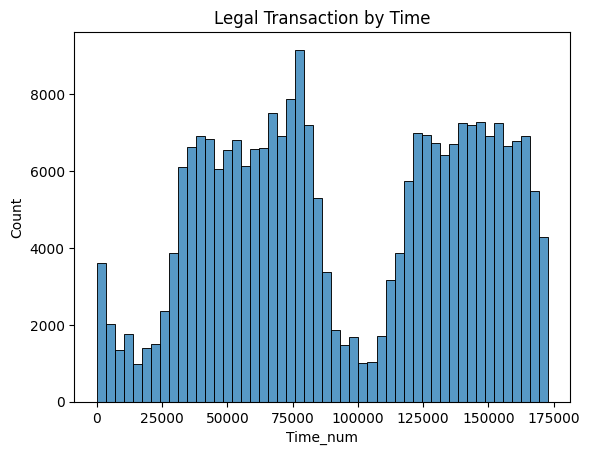

In [16]:
sns.histplot(x=(df.Time_num[df.Class==0]), bins=50)
plt.title("Legal Transaction by Time")
plt.show()

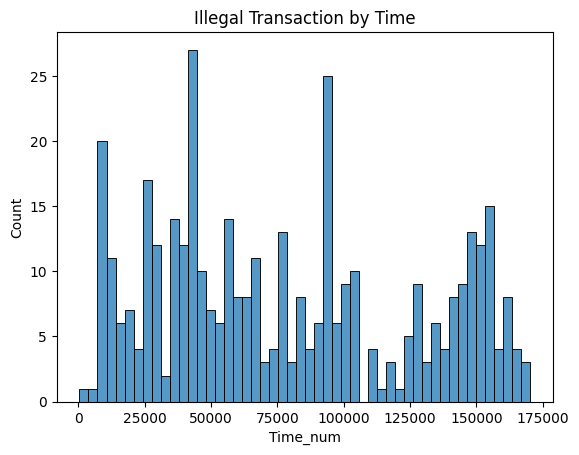

In [17]:
sns.histplot(x=(df.Time_num[df.Class==1]), bins=50)
plt.title("Illegal Transaction by Time")
plt.show()

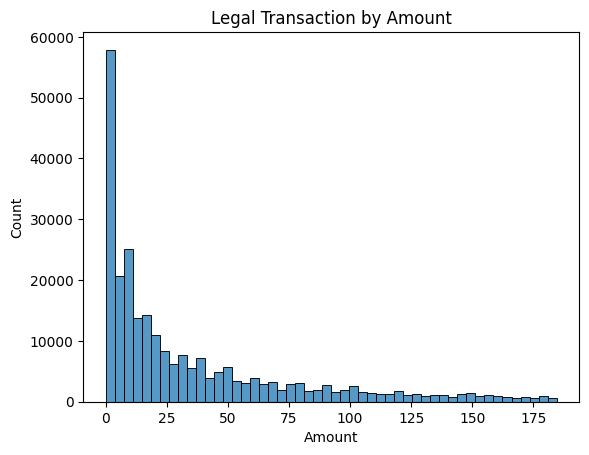

In [18]:
sns.histplot(x=(df.Amount[df.Class==0]), bins=50)
plt.title("Legal Transaction by Amount")
plt.show()

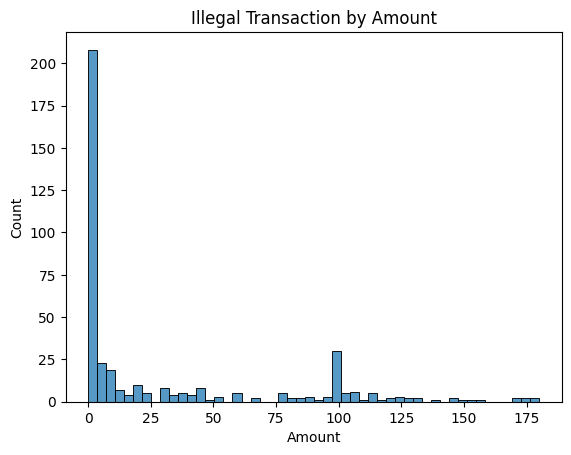

In [19]:
sns.histplot(x=(df.Amount[df.Class==1]), bins=50)
plt.title("Illegal Transaction by Amount")
plt.show()

In [20]:
columns_to_encode = ['Time_of_Day']
encoded_columns = pd.get_dummies(df, columns=columns_to_encode)
encoded = pd.concat([df, encoded_columns], axis=1)
df = df.drop(columns=['Time_of_Day'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [23]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(189676, 3) (189676,) (63226, 3) (63226,)


### Standard Scaling

In [24]:
X_train.columns

Index(['Time_num', 'TimeSinceLastTransaction', 'Amount'], dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler

amount_scaler = StandardScaler()
time_num_scaler = StandardScaler()
# Scaling 'Amount' in X_train
X_train['Amount'] = amount_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
# Scaling 'Time_num' in X_train
X_train['Time_num'] = time_num_scaler.fit_transform(X_train['Time_num'].values.reshape(-1, 1))

### Under Sampling the set

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts())

Class
0    301
1    301
Name: count, dtype: int64


### Model Selection

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

In [210]:

def train_model(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_test,y_test)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()
          ,KNeighborsClassifier(),GaussianNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_test,y_test)

Accuracy % of LogisticRegression: 0.9984183721886566
----------------------------------------------
Accuracy % of SVC: 0.9984183721886566
----------------------------------------------
Accuracy % of DecisionTreeClassifier: 0.9983709233543162
----------------------------------------------
Accuracy % of RandomForestClassifier: 0.9984183721886566
----------------------------------------------
Accuracy % of KNeighborsClassifier: 0.9984183721886566
----------------------------------------------
Accuracy % of GaussianNB: 0.9979280675671401
----------------------------------------------
Accuracy % of BernoulliNB: 0.9984183721886566
----------------------------------------------


In [213]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [50, 100, 200, 500, 1000]  
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


In [217]:
LR = LogisticRegression(C=0.001,penalty='l1',solver='liblinear',max_iter=50,class_weight='balanced')
LR.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=50, penalty='l1',
                   solver='liblinear')

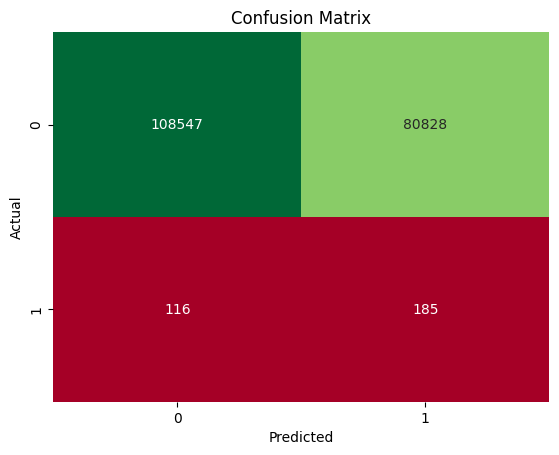

In [218]:
from sklearn.metrics import confusion_matrix

y_pred = LR.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [44]:
total_data = df.Class.value_counts()[0] + df.Class.value_counts()[1]
NFT = (df.Class.value_counts()[0]/total_data) * 100
FT = (df.Class.value_counts()[1]/total_data) * 100
print("Percentage of Fraudlent transfer = {} & Perdentage of Non-Fraudlent transfer = {}".format(FT,NFT))

Percentage of Fraudlent transfer = 0.1727485630620034 & Perdentage of Non-Fraudlent transfer = 99.82725143693798


<Axes: xlabel='Class', ylabel='count'>

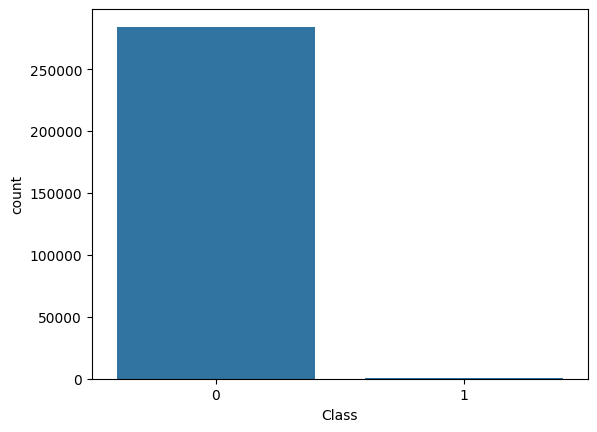

In [45]:
sns.barplot(data=df.Class.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

In [69]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [35]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [36]:
legit = legit.sample(892)
print('shape of fraud = {} & legit = {}'.format(fraud.shape,legit.shape))

shape of fraud = (492, 5) & legit = (892, 5)


In [7]:
df2 = pd.concat([legit, fraud], axis=0, ignore_index=True)

In [8]:
df2['Class'].value_counts()

Class
0    892
1    492
Name: count, dtype: int64

#### Data Split to Features & Predict 

In [37]:

x = df2.drop(columns=['Class'])
y = df2['Class']

NameError: name 'df2' is not defined

#### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

In [58]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (1107, 30)
train size y :  (1107,)
test size X :  (277, 30)
test size y :  (277,)


from imblearn.over_sampling import RandomOverSampler

# Example of random oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversampler.fit_resample(X_trains, y_trains)


#### Features Scaling

In [59]:

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=4.281332398719396,max_iter=1000,
                   penalty='l1', solver='saga',class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=4.281332398719396, class_weight='balanced', max_iter=1000,
                   penalty='l1', solver='saga')

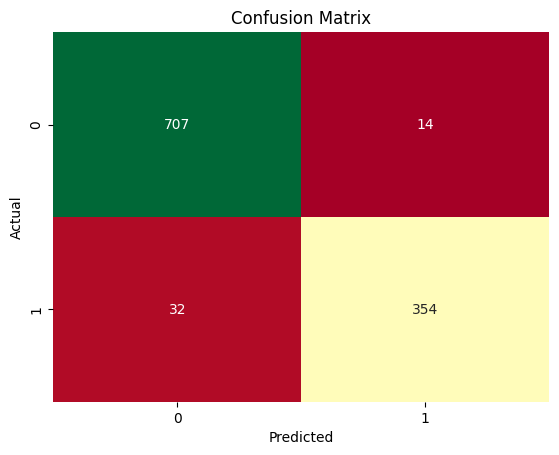

In [62]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = lr.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  0.9619565217391305
Recall =  0.917098445595855
F-1 Score =  0.9389920424403183


In [64]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validated Accuracy: 95.03%


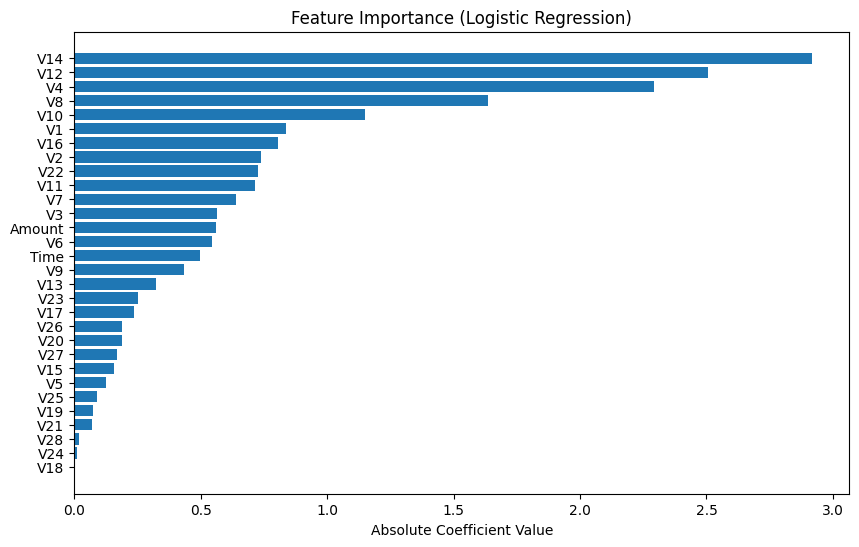

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# and X_train contains your training feature matrix

# Get the coefficients from the logistic regression model
coefficients = lr.coef_[0]

# Calculate the absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Define feature names manually or access them from wherever you defined them
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']  # Replace with your actual feature names

# Sort feature names by absolute coefficient values (importance)
sorted_feature_names = [x for _, x in sorted(zip(absolute_coefficients, feature_names), reverse=True)]

# Sort the coefficients accordingly
sorted_coefficients = np.sort(absolute_coefficients)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()



#### ROC

In [66]:
pred_score = lr.predict_proba(X_test)[:, 1]

In [67]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,pred_score)

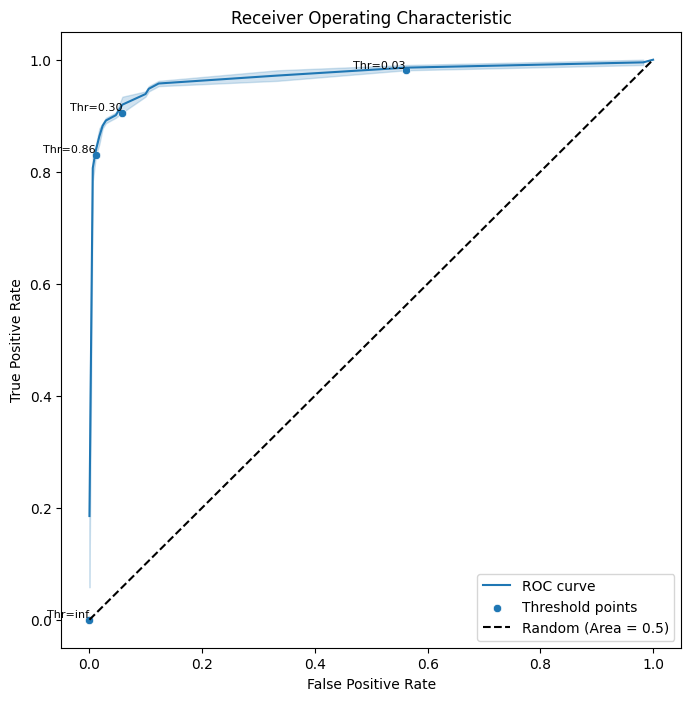

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the data
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

# Plot ROC curve
plt.figure(figsize=(8, 8))
sns.lineplot(data=roc_data, x='fpr', y='tpr', label='ROC curve')

# Plot threshold points
n = 10
indices = np.arange(len(thresholds)) % n == 0
sns.scatterplot(data=roc_data[indices], x='fpr', y='tpr', label='Threshold points')

# Add text labels for threshold points
for index, row in roc_data[indices].iterrows():
    plt.text(row['fpr'], row['tpr'], f"Thr={row['thresholds']:.2f}", fontsize=8, ha='right', va='bottom')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (Area = 0.5)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [94]:

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.2776417696857662


<Axes: xlabel='Predicted', ylabel='Actual'>

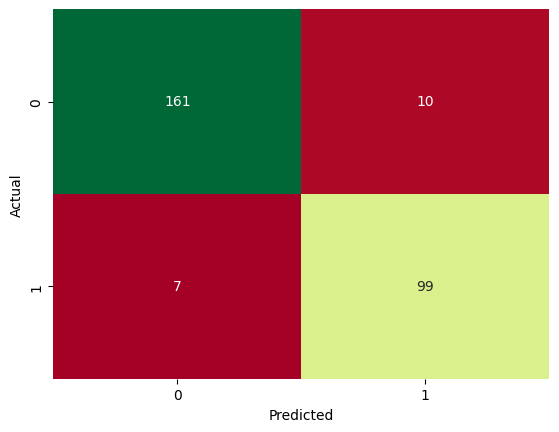

In [95]:

# Convert predicted probabilities to binary predictions using the optimal threshold
binary_predictions = (pred_score >= optimal_threshold).astype(int)
# Evaluate the performance with the optimal threshold
confusion_matrix = pd.crosstab(y_test, binary_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)

#### Precision / Recall Curve

In [96]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [97]:
# Assuming y_true and y_scores are your true labels and predicted scores
precision, recall, _ = precision_recall_curve(y_test, pred_score)


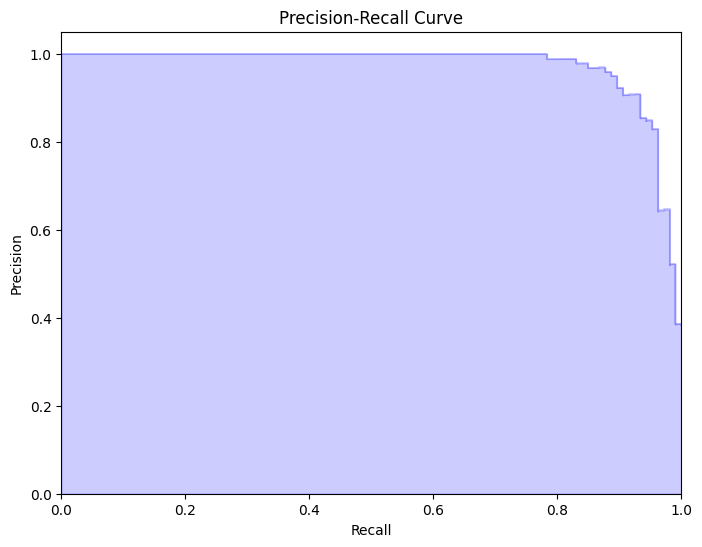

In [98]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


In [99]:
avg_precision = average_precision_score(y_test, pred_score)
print(f'Average Precision: {avg_precision:.2f}')


Average Precision: 0.97


#### Using Grid Seach CV

In [48]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [49]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [50]:

best_hp = clf.fit(X_test,y_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/jo/Desktop/Intership/TechnoHacks_Intership/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jo/Desktop/Intersh

In [51]:

best_hp.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='l1',
                   solver='saga')

### Using SMOTE 

In [109]:
x = df.drop(columns=['Class'])
y = df['Class']

In [110]:
from sklearn.model_selection import train_test_split

X_trains,X_test,y_trains,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_trains, y_trains)

In [112]:

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [119]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

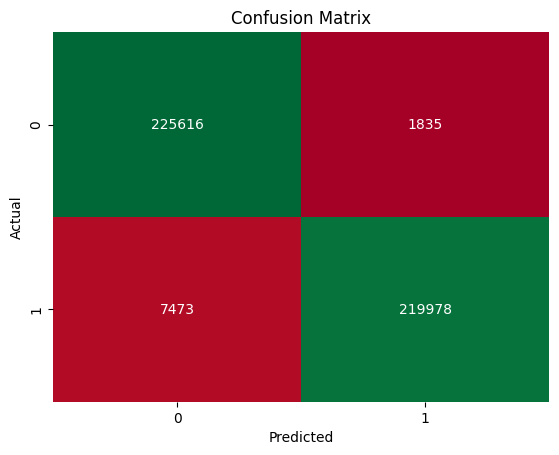

In [120]:
from sklearn.metrics import confusion_matrix

y_pred = lr2.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [121]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = lr2.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  0.9917272657598969
Recall =  0.9671445717978817
F-1 Score =  0.9792816695751274


In [122]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(lr2, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 97.94%


In [128]:

x = df2.drop(columns=['Class'])
y = df2['Class']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

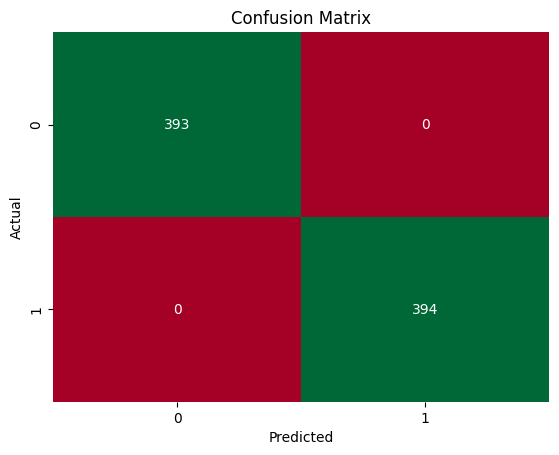

In [130]:
from sklearn.metrics import confusion_matrix

y_pred = gb_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = gb_classifier.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


In [132]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(gb_classifier, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 93.77%


In [ ]:
dsfasdf

# Focusing ON logistic Regression for now

In [15]:
# feature extraction
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x, y)
dtc.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

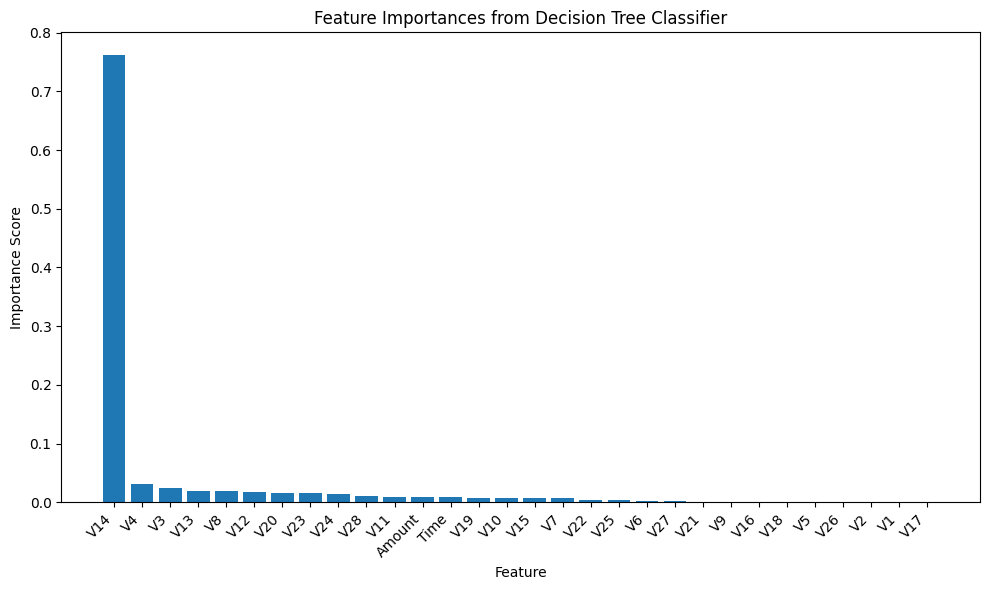

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dtc.feature_importances_ contains the importance scores
feature_importances = dtc.feature_importances_

# Assuming feature_names is a list of feature names (replace with your actual feature names)
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Sort the features based on their importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align="center")
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances from Decision Tree Classifier")
plt.tight_layout()
plt.show()


#### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

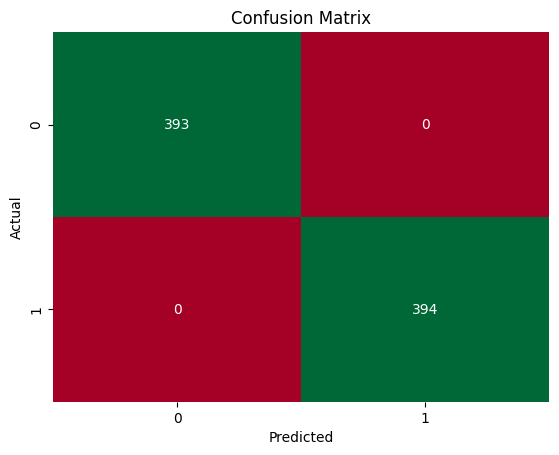

In [93]:
from sklearn.metrics import confusion_matrix

y_pred = dtree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = dtree.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 91.87%


#### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

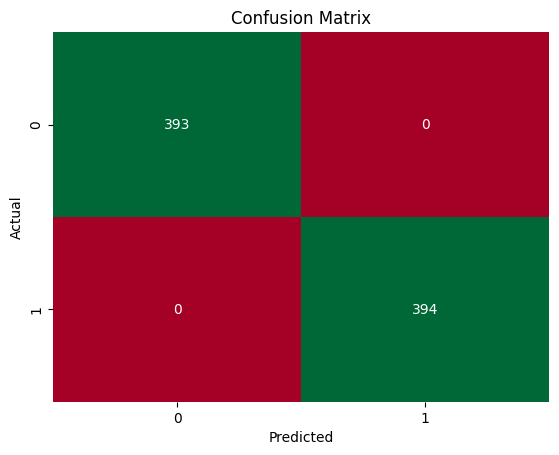

In [97]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [98]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = rfc.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 94.79%


#### XGBoost Classifier

In [100]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

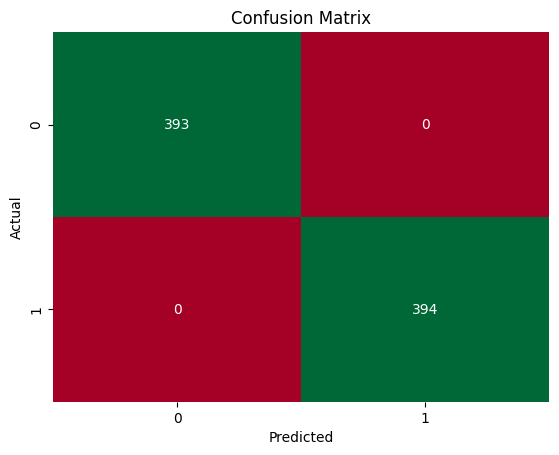

In [101]:
from sklearn.metrics import confusion_matrix

y_pred = xgb.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = xgb.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [103]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 94.02%


In [104]:
MP_Metrics = pd.DataFrame({'Models':['Decision Tree','Random Forest Classifier','Xgboost'],
                                   'Precision':[1,1,1],
                                   'Recall':[1,1,1],
                                   'F1-Score':[1,1,1],
                                   'Cross-Validation':[99.97,100,99.99]})
MP_Metrics

,Models,Precision,Recall,F1-Score,Cross-Validation
0,Decision Tree,1,1,1,99.97
1,Random Forest Classifier,1,1,1,100.00
2,Xgboost,1,1,1,99.99
